In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [5]:
inspector = inspect(engine)

In [6]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
date1 = dt.datetime(2017,8,23)
query_date = date1 - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
yr_Measurement =session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpDF = pd.DataFrame(yr_Measurement,columns = ['Date','Precipitation'])
prcpDF = prcpDF.set_index('Date')
prcpDF = prcpDF.sort_values(by=['Date'])
prcpDF

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


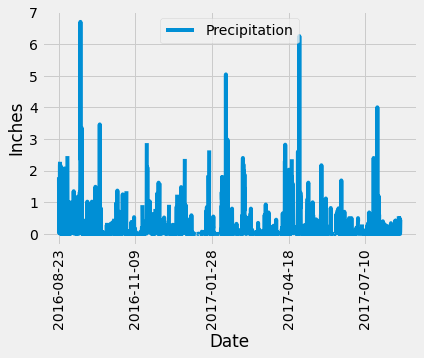

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prcpDF.plot()
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pd.DataFrame(prcpDF['Precipitation'].describe())
summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
#find the most recent date for the station 
date1=session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').all()
date1=date1[0][0]
date1

'2017-08-18'

In [21]:
#find the 12 months prior 
query_date = dt.datetime(2017,8,18) - dt.timedelta(days=365)
query_date

datetime.datetime(2016, 8, 18, 0, 0)

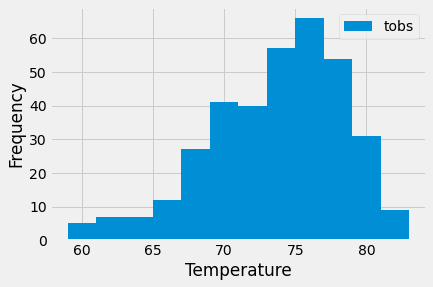

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date>=query_date).all()
df = pd.DataFrame(sel, columns=['Date','tobs'])
df = df.set_index('Date')
df = df.sort_values(by=['Date'])
#plot
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [26]:
session.close()